## Analysis of the gathered data 

### Armswinger Team 6

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import friedmanchisquare
from scipy.stats import ttest_rel
from statsmodels.stats.anova import AnovaRM
# %pip install scikit-posthocs
import scikit_posthocs as sp

In [2]:
collision_data = pd.read_excel(r'HCIDaten.xlsx', sheet_name='Collisions')
print(collision_data)

    Total Collisions (Indoor)  Unnamed: 1  Total Collisions (Outdoor)  \
0                          13         NaN                          10   
1                          15         NaN                          43   
2                          30         NaN                          15   
3                          21         NaN                          27   
4                          45         NaN                          23   
5                          38         NaN                          96   
6                           8         NaN                           8   
7                           7         NaN                          37   
8                           8         NaN                          15   
9                           4         NaN                           5   
10                          6         NaN                           8   
11                        NaN         NaN                         NaN   
12                        195         NaN          

In [3]:
condition = collision_data["condition"].dropna()
collisions = collision_data["collisions"].dropna()
dataframe = pd.concat([condition, collisions], axis=1)
participants_id = np.tile(np.arange(0, 11, 1), (3,1)).reshape(33,)
participants_id = pd.Series(participants_id, name="ID")
dataframe = pd.concat([participants_id, dataframe], axis=1)
dataframe[:20]

,ID,condition,collisions
0,0,0.0,23.0
1,1,0.0,58.0
2,2,0.0,45.0
3,3,0.0,48.0
4,4,0.0,68.0
5,5,0.0,134.0
6,6,0.0,16.0
7,7,0.0,44.0
8,8,0.0,23.0
9,9,0.0,9.0


In [4]:
cpIn_data = pd.read_excel(r'HCIDaten.xlsx', sheet_name='CheckpointsIn')
timeIn = cpIn_data["timeIn"].dropna()
dataframe1 = pd.concat([dataframe, timeIn], axis=1)

cpOut_data = pd.read_excel(r'HCIDaten.xlsx', sheet_name='CheckpointsOut')
timeOut = cpOut_data["timeOut"].dropna()
dataframe1 = pd.concat([dataframe1, timeOut], axis=1)
dataframe1[:34]

,ID,condition,collisions,timeIn,timeOut
0,0,0.0,23.0,49.100933,107.413991
1,1,0.0,58.0,68.520519,165.958630
2,2,0.0,45.0,144.213995,30.240498
3,3,0.0,48.0,81.578325,81.238378
4,4,0.0,68.0,79.428700,136.692390
5,5,0.0,134.0,134.350000,120.871234
6,6,0.0,16.0,63.359300,80.850200
7,7,0.0,44.0,93.136390,140.573210
8,8,0.0,23.0,96.800000,145.311580
9,9,0.0,9.0,66.160000,149.150000


In [5]:
usability_data = pd.read_excel(r'HCIDaten.xlsx', sheet_name='Usability')
usability = usability_data["usability"].dropna()
dataframe2 = pd.concat([dataframe1, usability], axis=1)

sus_data = pd.read_excel(r'HCIDaten.xlsx', sheet_name='SUS')
sus = sus_data["sus"].dropna()
dataframe2 = pd.concat([dataframe2, sus], axis=1)

ssq_data = pd.read_excel(r'HCIDaten.xlsx', sheet_name='SSQ')
ssq = ssq_data["totalScore"].dropna()
dataframe2 = pd.concat([dataframe2, ssq], axis=1)
dataframe2[:34]

,ID,condition,collisions,timeIn,timeOut,usability,sus,totalScore
0,0,0.0,23.0,49.100933,107.413991,85.0,0.000000,29.92
1,1,0.0,58.0,68.520519,165.958630,77.5,0.000000,14.96
2,2,0.0,45.0,144.213995,30.240498,92.5,0.000000,0.00
3,3,0.0,48.0,81.578325,81.238378,52.5,0.000000,48.62
4,4,0.0,68.0,79.428700,136.692390,82.5,0.000000,41.14
5,5,0.0,134.0,134.350000,120.871234,72.5,0.000000,18.70
6,6,0.0,16.0,63.359300,80.850200,72.5,0.166667,26.18
7,7,0.0,44.0,93.136390,140.573210,85.0,0.000000,52.36
8,8,0.0,23.0,96.800000,145.311580,80.0,0.000000,37.40
9,9,0.0,9.0,66.160000,149.150000,92.5,0.000000,7.48


In [6]:
nasa_data = pd.read_excel(r'HCIDaten.xlsx', sheet_name='NasaTLX')
nasa = nasa_data["$del_totalScore"].dropna()
dataframe3 = pd.concat([dataframe2, nasa], axis=1)

finalq_data = pd.read_excel(r'HCIDaten.xlsx', sheet_name='FinalQuestion')
finalq = finalq_data["score"].dropna()
dataframe3 = pd.concat([dataframe2, finalq], axis=1)
dataframe3[:33]

,ID,condition,collisions,timeIn,timeOut,usability,sus,totalScore,score
0,0,0.0,23.0,49.100933,107.413991,85.0,0.000000,29.92,5.0
1,1,0.0,58.0,68.520519,165.958630,77.5,0.000000,14.96,4.0
2,2,0.0,45.0,144.213995,30.240498,92.5,0.000000,0.00,5.0
3,3,0.0,48.0,81.578325,81.238378,52.5,0.000000,48.62,3.0
4,4,0.0,68.0,79.428700,136.692390,82.5,0.000000,41.14,4.0
5,5,0.0,134.0,134.350000,120.871234,72.5,0.000000,18.70,4.0
6,6,0.0,16.0,63.359300,80.850200,72.5,0.166667,26.18,4.0
7,7,0.0,44.0,93.136390,140.573210,85.0,0.000000,52.36,4.0
8,8,0.0,23.0,96.800000,145.311580,80.0,0.000000,37.40,4.0
9,9,0.0,9.0,66.160000,149.150000,92.5,0.000000,7.48,5.0


#### Collisions:

In [32]:
shapiro(dataframe3["collisions"])
# If pvalue > 0.05, then normally distributed

ShapiroResult(statistic=0.39839792251586914, pvalue=1.6275725212011594e-10)

In [33]:
collision_data = [dataframe3.loc[dataframe3["condition"] == 0.0]["collisions"], dataframe3.loc[dataframe3["condition"] == 1.0]["collisions"], dataframe3.loc[dataframe3["condition"] == 2.0]["collisions"]]
friedmanchisquare(collision_data[0], collision_data[1], collision_data[2])
# If pvalue < 0.05, then there is a significant difference

FriedmanchisquareResult(statistic=11.454545454545467, pvalue=0.0032559449856857953)

In [34]:
sp.posthoc_nemenyi_friedman(np.array([collision_data[0], collision_data[1], collision_data[2]]).T)

,0,1,2
0,1.000000,0.777626,0.028360
1,0.777626,1.000000,0.003955
2,0.028360,0.003955,1.000000


The Nemenyi test shows that data group 0 and 2 and 1 and 2 have significant differences.
No significant difference between the two armswingers.

#### timeIn + timeOut:

In [10]:
print("TimeIn distribution: ", shapiro(dataframe3["timeIn"]))
print("TimeOut distribution: ", shapiro(dataframe3["timeOut"]))

TimeIn distribution:  ShapiroResult(statistic=0.9872694611549377, pvalue=0.9584723711013794)
TimeOut distribution:  ShapiroResult(statistic=0.9740899801254272, pvalue=0.600706934928894)


In [11]:
anova_timeIn = AnovaRM(data=dataframe3, depvar='timeIn', subject='ID', within=['condition']).fit()
anova_timeOut = AnovaRM(data=dataframe3, depvar='timeOut', subject='ID', within=['condition']).fit()

print("Time In Anova: ", anova_timeIn)
print("Time Out Anova: ", anova_timeOut)

Time In Anova:                   Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
condition  7.4131 2.0000 20.0000 0.0039

Time Out Anova:                   Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
condition  4.0786 2.0000 20.0000 0.0327



In [15]:
data_timeIn = [dataframe3.loc[dataframe3["condition"] == 0.0]["timeIn"], dataframe3.loc[dataframe3["condition"] == 1.0]["timeIn"], dataframe3.loc[dataframe3["condition"] == 2.0]["timeIn"]]
ttest1 = ttest_rel(data_timeIn[0], data_timeIn[1])
ttest2 = ttest_rel(data_timeIn[1], data_timeIn[2])
ttest3 = ttest_rel(data_timeIn[0], data_timeIn[2])
print("TimeIn 0 and 1: ", ttest1)
print("TimeIn 1 and 2: ", ttest2)
print("TimeIn 0 and 2: ", ttest3)

data_timeOut = [dataframe3.loc[dataframe3["condition"] == 0.0]["timeOut"], dataframe3.loc[dataframe3["condition"] == 1.0]["timeOut"], dataframe3.loc[dataframe3["condition"] == 2.0]["timeOut"]]
ttest1 = ttest_rel(data_timeOut[0], data_timeOut[1])
ttest2 = ttest_rel(data_timeOut[1], data_timeOut[2])
ttest3 = ttest_rel(data_timeOut[0], data_timeOut[2])
print("TimeOut 0 and 1: ", ttest1)
print("TimeOut 1 and 2: ", ttest2)
print("TimeOut 0 and 2: ", ttest3)

TimeIn 0 and 1:  Ttest_relResult(statistic=-3.0024545410034644, pvalue=0.013287807918904746)
TimeIn 1 and 2:  Ttest_relResult(statistic=-0.4121719833314581, pvalue=0.6889099362689712)
TimeIn 0 and 2:  Ttest_relResult(statistic=-4.251904550619182, pvalue=0.0016844301885570638)
TimeOut 0 and 1:  Ttest_relResult(statistic=-2.3508745263486315, pvalue=0.040580064687186335)
TimeOut 1 and 2:  Ttest_relResult(statistic=-0.251821912008444, pvalue=0.8062784687172014)
TimeOut 0 and 2:  Ttest_relResult(statistic=-3.8131575726772855, pvalue=0.0034115314038713)


#### Usability:

In [16]:
print("Usability distribution: ", shapiro(dataframe3["usability"]))

Usability distribution:  ShapiroResult(statistic=0.9494640231132507, pvalue=0.12832891941070557)


In [20]:
anova_usability = AnovaRM(data=dataframe3, depvar='usability', subject='ID', within=['condition']).fit()
print("Time In Anova: ", anova_usability )

Time In Anova:                   Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
condition 10.3860 2.0000 20.0000 0.0008



In [22]:
data_usability = [dataframe3.loc[dataframe3["condition"] == 0.0]["usability"], dataframe3.loc[dataframe3["condition"] == 1.0]["usability"], dataframe3.loc[dataframe3["condition"] == 2.0]["usability"]]
ttest1 = ttest_rel(data_usability[0], data_usability[1])
ttest2 = ttest_rel(data_usability[1], data_usability[2])
ttest3 = ttest_rel(data_usability[0], data_usability[2])
print("usability 0 and 1: ", ttest1)
print("usability 1 and 2: ", ttest2)
print("usability 0 and 2: ", ttest3)

usability 0 and 1:  Ttest_relResult(statistic=4.145788773294939, pvalue=0.001993353188525176)
usability 1 and 2:  Ttest_relResult(statistic=-1.1266515790639304, pvalue=0.2861994095512227)
usability 0 and 2:  Ttest_relResult(statistic=3.8932927846007943, pvalue=0.0029934775617331327)


#### SUS:

In [40]:
print("SUS distribution: ", shapiro(dataframe3["sus"]))

SUS distribution:  ShapiroResult(statistic=0.4412251114845276, pvalue=4.325132474392035e-10)


In [41]:
sus_data = [dataframe3.loc[dataframe3["condition"] == 0.0]["sus"], dataframe3.loc[dataframe3["condition"] == 1.0]["sus"], dataframe3.loc[dataframe3["condition"] == 2.0]["sus"]]

print("SUS friedmans chi square: ",  friedmanchisquare(sus_data[0], sus_data[1], sus_data[2]))

SUS friedmans chi square:  FriedmanchisquareResult(statistic=0.39999999999996966, pvalue=0.8187307530779944)


No significant difference!

#### NAS TLX total score:

In [23]:
print("NAS distribution: ", shapiro(dataframe3["totalScore"]))

NAS distribution:  ShapiroResult(statistic=0.8001661896705627, pvalue=3.251035377616063e-05)


In [43]:
nasa_data = [dataframe3.loc[dataframe3["condition"] == 0.0]["totalScore"], dataframe3.loc[dataframe3["condition"] == 1.0]["totalScore"], dataframe3.loc[dataframe3["condition"] == 2.0]["totalScore"]]

print("NAS friedmans chi square: ",  friedmanchisquare(nasa_data[0], nasa_data[1], nasa_data[2]))

NAS friedmans chi square:  FriedmanchisquareResult(statistic=5.024390243902444, pvalue=0.08109004119976754)


No significant difference!

#### Final Question:

In [25]:
print("Final Question distribution: ", shapiro(dataframe3["score"]))

Final Question distribution:  ShapiroResult(statistic=0.8929708003997803, pvalue=0.0035180021077394485)


In [45]:
final_data = [dataframe3.loc[dataframe3["condition"] == 0.0]["score"], dataframe3.loc[dataframe3["condition"] == 1.0]["score"], dataframe3.loc[dataframe3["condition"] == 2.0]["score"]]

print("Final Question friedmans chi square: ",  friedmanchisquare(final_data[0], final_data[1], final_data[2]))

Final Question friedmans chi square:  FriedmanchisquareResult(statistic=13.028571428571443, pvalue=0.0014821141744507944)


In [46]:
sp.posthoc_nemenyi_friedman(np.array([final_data[0], final_data[1], final_data[2]]).T)

,0,1,2
0,1.000000,0.003955,0.133345
1,0.003955,1.000000,0.408622
2,0.133345,0.408622,1.000000


Significant difference between 0 and 1 (both armswinger).

# PLOTS

[]

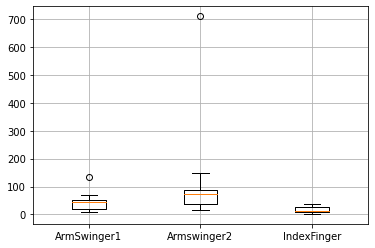

In [36]:
# Collisions:
fig, ax = plt.subplots()
plt.boxplot(collision_data, labels=["ArmSwinger1", "Armswinger2", "IndexFinger"])
plt.grid()
plt.plot()

[]

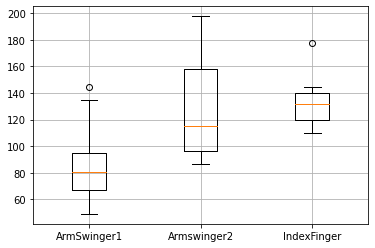

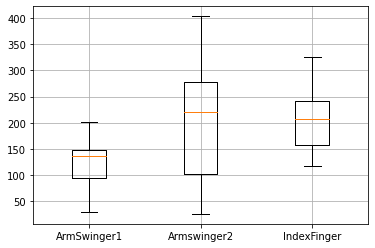

In [37]:
# TimeIn + TimeOut:
fig, ax = plt.subplots()
plt.boxplot(data_timeIn, labels=["ArmSwinger1", "Armswinger2", "IndexFinger"])
plt.grid()
plt.plot()

fig, ax = plt.subplots()
plt.boxplot(data_timeOut, labels=["ArmSwinger1", "Armswinger2", "IndexFinger"])
plt.grid()
plt.plot()

[]

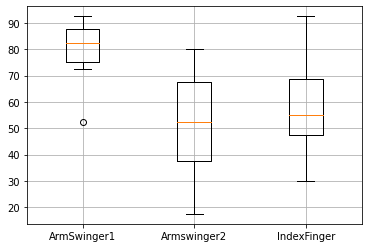

In [39]:
# Usability:
fig, ax = plt.subplots()
plt.boxplot(data_usability, labels=["ArmSwinger1", "Armswinger2", "IndexFinger"])
plt.grid()
plt.plot()

[]

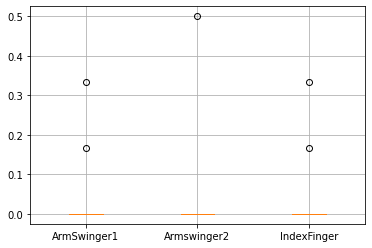

In [42]:
# SUS:
fig, ax = plt.subplots()
plt.boxplot(sus_data, labels=["ArmSwinger1", "Armswinger2", "IndexFinger"])
plt.grid()
plt.plot()

[]

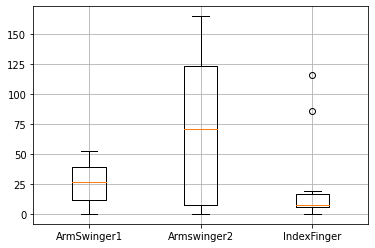

In [44]:
# NASA TLX:
fig, ax = plt.subplots()
plt.boxplot(nasa_data, labels=["ArmSwinger1", "Armswinger2", "IndexFinger"])
plt.grid()
plt.plot()

[]

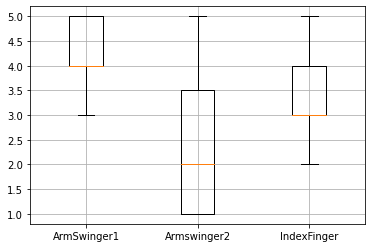

In [47]:
# Final Question:
fig, ax = plt.subplots()
plt.boxplot(final_data, labels=["ArmSwinger1", "Armswinger2", "IndexFinger"])
plt.grid()
plt.plot()